# Analisis de supuesto de ANOVA

 Para que el ANOVA sea válido, se deben cumplir ciertos supuestos fundamentales.

In [ ]:
1. Normalidad de los residuos
El ANOVA asume que los residuos (errores) siguen una distribución normal. Para verificarlo, puedes utilizar:

Pruebas estadísticas: Shapiro-Wilk, Kolmogorov-Smirnov, Anderson-Darling.

Gráficos: Histograma de residuos, QQ-plot.

One-way ANOVA results:
            sum_sq     df         F    PR(>F)
C(Team)   0.016085    9.0  1.872382  0.053867
Residual  0.467701  490.0       NaN       NaN
                   ------------
Estadístico=0.9931433544102369, p-valor=0.02226923197556388


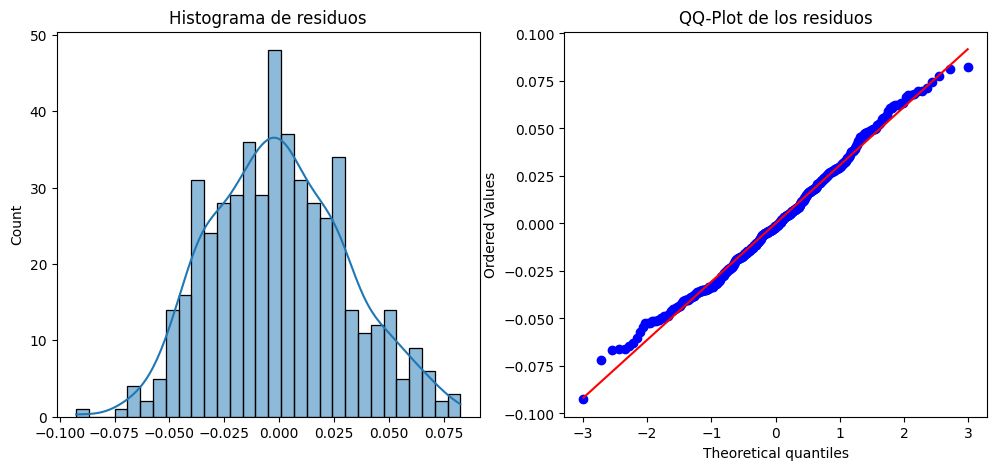

In [2]:
from scipy.stats import shapiro
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Load the data
data = pd.read_csv("formula1_enhanced_data_final.csv")


# Prepare the data for ANOVA
# We'll use 'Team' as the independent variable and 'ReactionTime' as the dependent variable
data['ReactionTime'] = pd.to_numeric(data['ReactionTime'], errors='coerce')
data = data.dropna(subset=['Team', 'ReactionTime'])

# Perform one-way ANOVA
model = ols('ReactionTime ~ C(Team)', data=data).fit()
anova_table = anova_lm(model, typ=2)

print("One-way ANOVA results:")
print(anova_table)

print("                   ------------")

p_value = anova_table["PR(>F)"].iloc[0]  # Extraer el p-valor de la tabla

residuos = model.resid
stat, p = shapiro(residuos)
print(f"Estadístico={stat}, p-valor={p}")


# Graficar los residuos para evaluar normalidad y homocedasticidad
plt.figure(figsize=(12, 5))

# Histograma de los residuos
plt.subplot(1, 2, 1)
sns.histplot(residuos, bins=30, kde=True)
plt.title("Histograma de residuos")

# QQ-Plot (para verificar normalidad)
plt.subplot(1, 2, 2)
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("QQ-Plot de los residuos")

plt.show()

2. Homocedasticidad (igualdad de varianzas)
Las varianzas de los grupos deben ser aproximadamente iguales. Para probarlo:

Pruebas estadísticas: Levene, Bartlett o Fligner-Killeen.
Gráficos: Boxplots, residual vs. fitted plot.

In [4]:
from scipy.stats import levene

# Obtener los tiempos de reacción agrupados por equipo
grupos = [data.loc[data["Team"] == equipo, "ReactionTime"] for equipo in data["Team"].unique()]

# Aplicar la prueba de Levene
stat, p = levene(*grupos)

print(f"Prueba de Levene: Estadístico={stat:.4f}, p-valor={p:.4f}")

# Interpretación
if p < 0.05:
    print("Las varianzas entre los grupos son significativamente diferentes (no hay homocedasticidad).")
else:
    print("No hay evidencia suficiente para afirmar que las varianzas son diferentes (se cumple la homocedasticidad).")



Prueba de Levene: Estadístico=0.8311, p-valor=0.5877
No hay evidencia suficiente para afirmar que las varianzas son diferentes (se cumple la homocedasticidad).


### Interpretación del resultado
Si el p-valor < 0.05, las varianzas son significativamente diferentes entre los equipos (violación del supuesto de homocedasticidad).

Si el p-valor ≥ 0.05, no hay diferencias significativas en las varianzas (el supuesto de homocedasticidad se cumple y el ANOVA es válido).

Si el supuesto no se cumple, se recomienda usar un ANOVA robusto (como Welch's ANOVA) o pruebas no paramétricas como Kruskal-Wallis.

## Independencia de las observaciones 

Cada observación debe ser independiente de las demás. Para verificarlo:

Diseño del estudio: Asegurar que los datos fueron recolectados sin dependencias.
Test de Durbin-Watson: Para detectar autocorrelación en series temporales

In [5]:
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(residuos)
print(f"Durbin-Watson={dw_stat}")


Durbin-Watson=1.9164222340832016


Un valor cercano a 2 indica independencia; valores muy bajos o altos sugieren autocorrelación.

Si los supuestos no se cumplen, puedes usar transformaciones (logaritmo, raíz cuadrada) o pruebas no paramétricas como Kruskal-Wallis.